In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry', 'site_area', 'land_use']]
blocks_gdf.head()

,geometry,site_area,land_use
id,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",8.044667e+05,None
1,"POLYGON ((355412.142 6623378.149, 355411.7 662...",2.317313e+04,transport
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",3.630058e+05,recreation
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",1.964145e+05,residential
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",1.781752e+06,recreation


## Collocation

In [2]:
from blocksnet.relations import generate_adjacency_graph

adjacency_graph = generate_adjacency_graph(blocks_gdf, 10)

2025-04-09 18:03:15.059 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_nodes:10 - Generating nodes
2025-04-09 18:03:15.068 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_edges:15 - Generating edges
2025-04-09 18:03:21.358 | SUCCESS  | blocksnet.relations.adjacency.core:generate_adjacency_graph:38 - Adjacency graph successfully generated: 16320 nodes, 71988 edges


In [3]:
from blocksnet.analysis.land_use import land_use_collocation

blocks_df = land_use_collocation(adjacency_graph, blocks_gdf)

100%|██████████| 16320/16320 [00:10<00:00, 1610.29it/s]


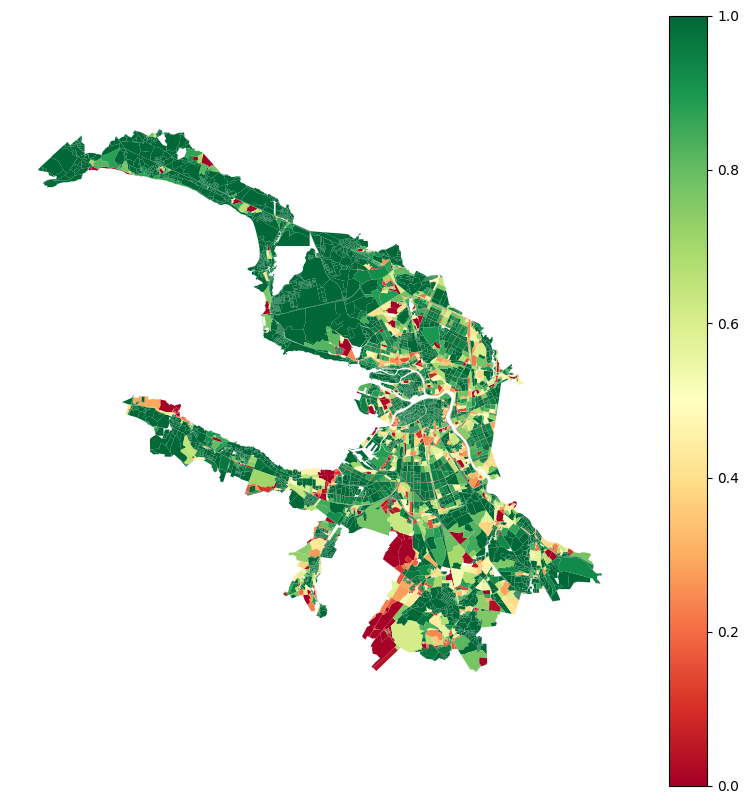

In [4]:
blocks_gdf[['geometry']].join(blocks_df).plot('collocation', vmin=0, vmax=1, cmap='RdYlGn', figsize=(10,10), legend=True).set_axis_off()

## Share

In [5]:
from blocksnet.analysis.land_use import calculate_land_use_shares

shares = calculate_land_use_shares(blocks_df)
shares

{<LandUse.RESIDENTIAL: 'residential'>: 0.34847566434458555,
 <LandUse.BUSINESS: 'business'>: 0.021597637595556416,
 <LandUse.RECREATION: 'recreation'>: 0.3077958841272743,
 <LandUse.INDUSTRIAL: 'industrial'>: 0.0981317938617859,
 <LandUse.TRANSPORT: 'transport'>: 0.11112436232213162,
 <LandUse.SPECIAL: 'special'>: 0.025269037817307705,
 <LandUse.AGRICULTURE: 'agriculture'>: 0.051444156702530795}

## Indicators

In [6]:
from blocksnet.analysis.land_use import calculate_land_use_indicators

calculate_land_use_indicators(shares, blocks_gdf.area.sum())

{'site_area': 1311361562.2895195,
 'build_floor_area': 1166505470.7628858,
 'footprint_area': 463301192.9012068,
 'living_area': 746743027.3170079,
 'non_living_area': 419762443.44587797,
 'population': 24891434.0}